In [1]:
import numpy as np 
import PySO
import os

In [2]:
#Simple gaussian to optimize/sample 
class GaussianModel(PySO.Model):
    """
    A simple 2D Gaussian
    """
    
    names    = ['x', 'y'] 
    bounds   = [[-10,10], [-10,10]]
    periodic = [0, 0]

    def log_likelihood(self, param):
        return -0.5 * ((param['x']-2.5)**2 + (param['y']+1.9)**2) - 0.5 * np.log(2*np.pi)


In [3]:

mymodel = GaussianModel()

NumParticles = 100

outdir = 'results/'

myswarm = PySO.Swarm(mymodel,
                     NumParticles,
                     Output = outdir,
                     Verbose = True,
                     Nperiodiccheckpoint = 1, # Final two args mean evolution is saved at every iteration. Only necessary if running myswarm.Plot()
                     Saveevolution = True,    ############
                     Omega = 0, Phip = 0, Phig = 0, Mh_fraction = 1.0, Maxiter=1000)

# Clear any existing history file
history_file = os.path.join(outdir, "SwarmEvolutionHistory.dat")
if os.path.isfile(history_file): os.system('rm {}'.format(history_file))

myswarm.Run()

myswarm.PlotSwarmEvolution()


Iteration: 1, Max Value: -0.9478105856479058 at [ 2.26550965 -1.8474797 ], Spread: 117.03720186649085
Iteration: 2, Max Value: -0.9331389965908758 at [ 2.42776367 -1.74774088], Spread: 107.16359441130936
Iteration: 3, Max Value: -0.9331389965908758 at [ 2.42776367 -1.74774088], Spread: 99.23241657538892
Iteration: 4, Max Value: -0.9307611280316781 at [ 2.57240729 -1.76434465], Spread: 99.28917066404053
Iteration: 5, Max Value: -0.9307611280316781 at [ 2.57240729 -1.76434465], Spread: 99.264311668759
Iteration: 6, Max Value: -0.9307611280316781 at [ 2.57240729 -1.76434465], Spread: 98.39557660002677
Iteration: 7, Max Value: -0.9307611280316781 at [ 2.57240729 -1.76434465], Spread: 98.39557660002677
Iteration: 8, Max Value: -0.9190203008165501 at [ 2.51265108 -1.90186691], Spread: 95.20961976318611
Iteration: 9, Max Value: -0.9190203008165501 at [ 2.51265108 -1.90186691], Spread: 95.20961976318611
Iteration: 10, Max Value: -0.9190203008165501 at [ 2.51265108 -1.90186691], Spread: 86.2140

In [4]:
import pandas as pd 
pd = pd.read_csv('results/SwarmEvolutionHistory.dat')
pd

# particle_number         x         y   function_value
0                       0  9.262380  9.511158       -88.891091
1                       1  1.294193 -7.684347       -18.375260
2                       2  4.412363  5.903252       -33.192878
3                       3  8.055385  3.099686       -28.848520
4                       4  3.403111  7.868751       -49.040994
...                   ...       ...       ...              ...
100095                 95  1.633566 -1.412447        -1.413146
100096                 96  2.161544 -1.486365        -1.061762
100097                 97  3.843114 -2.422363        -1.957348
100098                 98  1.341093  0.529328        -4.541287
100099                 99  1.782076 -2.401302        -1.302298

[100100 rows x 4 columns]

In [5]:
posterior = np.array([pd[' x'].to_numpy(),pd[' y'].to_numpy()]).T
posterior.shape

(100100, 2)

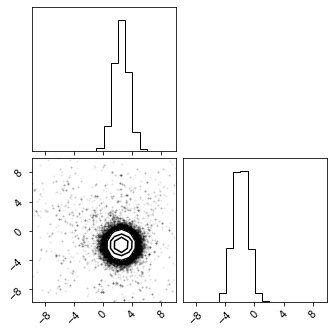

In [6]:
import corner
corner.corner(posterior,plot_density=False)